In [30]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.optimize import curve_fit
import scienceplots
plt.style.use('science')
plt.rcParams.update({'font.size': 25})


In [21]:
data = pd.read_excel("OP AMP.xlsx", sheet_name="Adder")

In [22]:
data

,SL no.,V1(V),V2(V),V3(V),Column 1,Vo(meas),Vo(Theo)
0,1,4.93,2.01,1.07,8.16,-8.16,8.01
1,2,5.91,2.42,1.28,9.80,-9.80,9.61
2,3,2.40,1.18,0.56,4.20,-4.20,4.14
3,4,3.94,1.58,0.86,6.50,-6.50,6.38
4,5,4.00,1.83,1.16,7.13,-7.13,6.99
5,6,3.28,1.45,0.80,5.63,-5.63,5.53
6,7,3.34,1.64,0.77,5.86,-5.86,5.75
7,8,5.12,2.57,1.06,8.93,-8.93,8.75
8,9,4.49,2.20,1.04,7.88,-7.88,7.73
9,10,5.70,2.13,0.89,8.92,-8.92,8.72


In [23]:
vom = -np.asarray(data["Vo(meas)"])
vot = np.asarray(data["Vo(Theo)"])

In [41]:
def linfit(x,a,b):
    return a*x+b

params, cov = curve_fit(linfit, vot, vom)
perr = np.sqrt(np.diag(cov))
params, perr

(array([ 1.02493347, -0.0385486 ]), array([0.00191979, 0.01409723]))

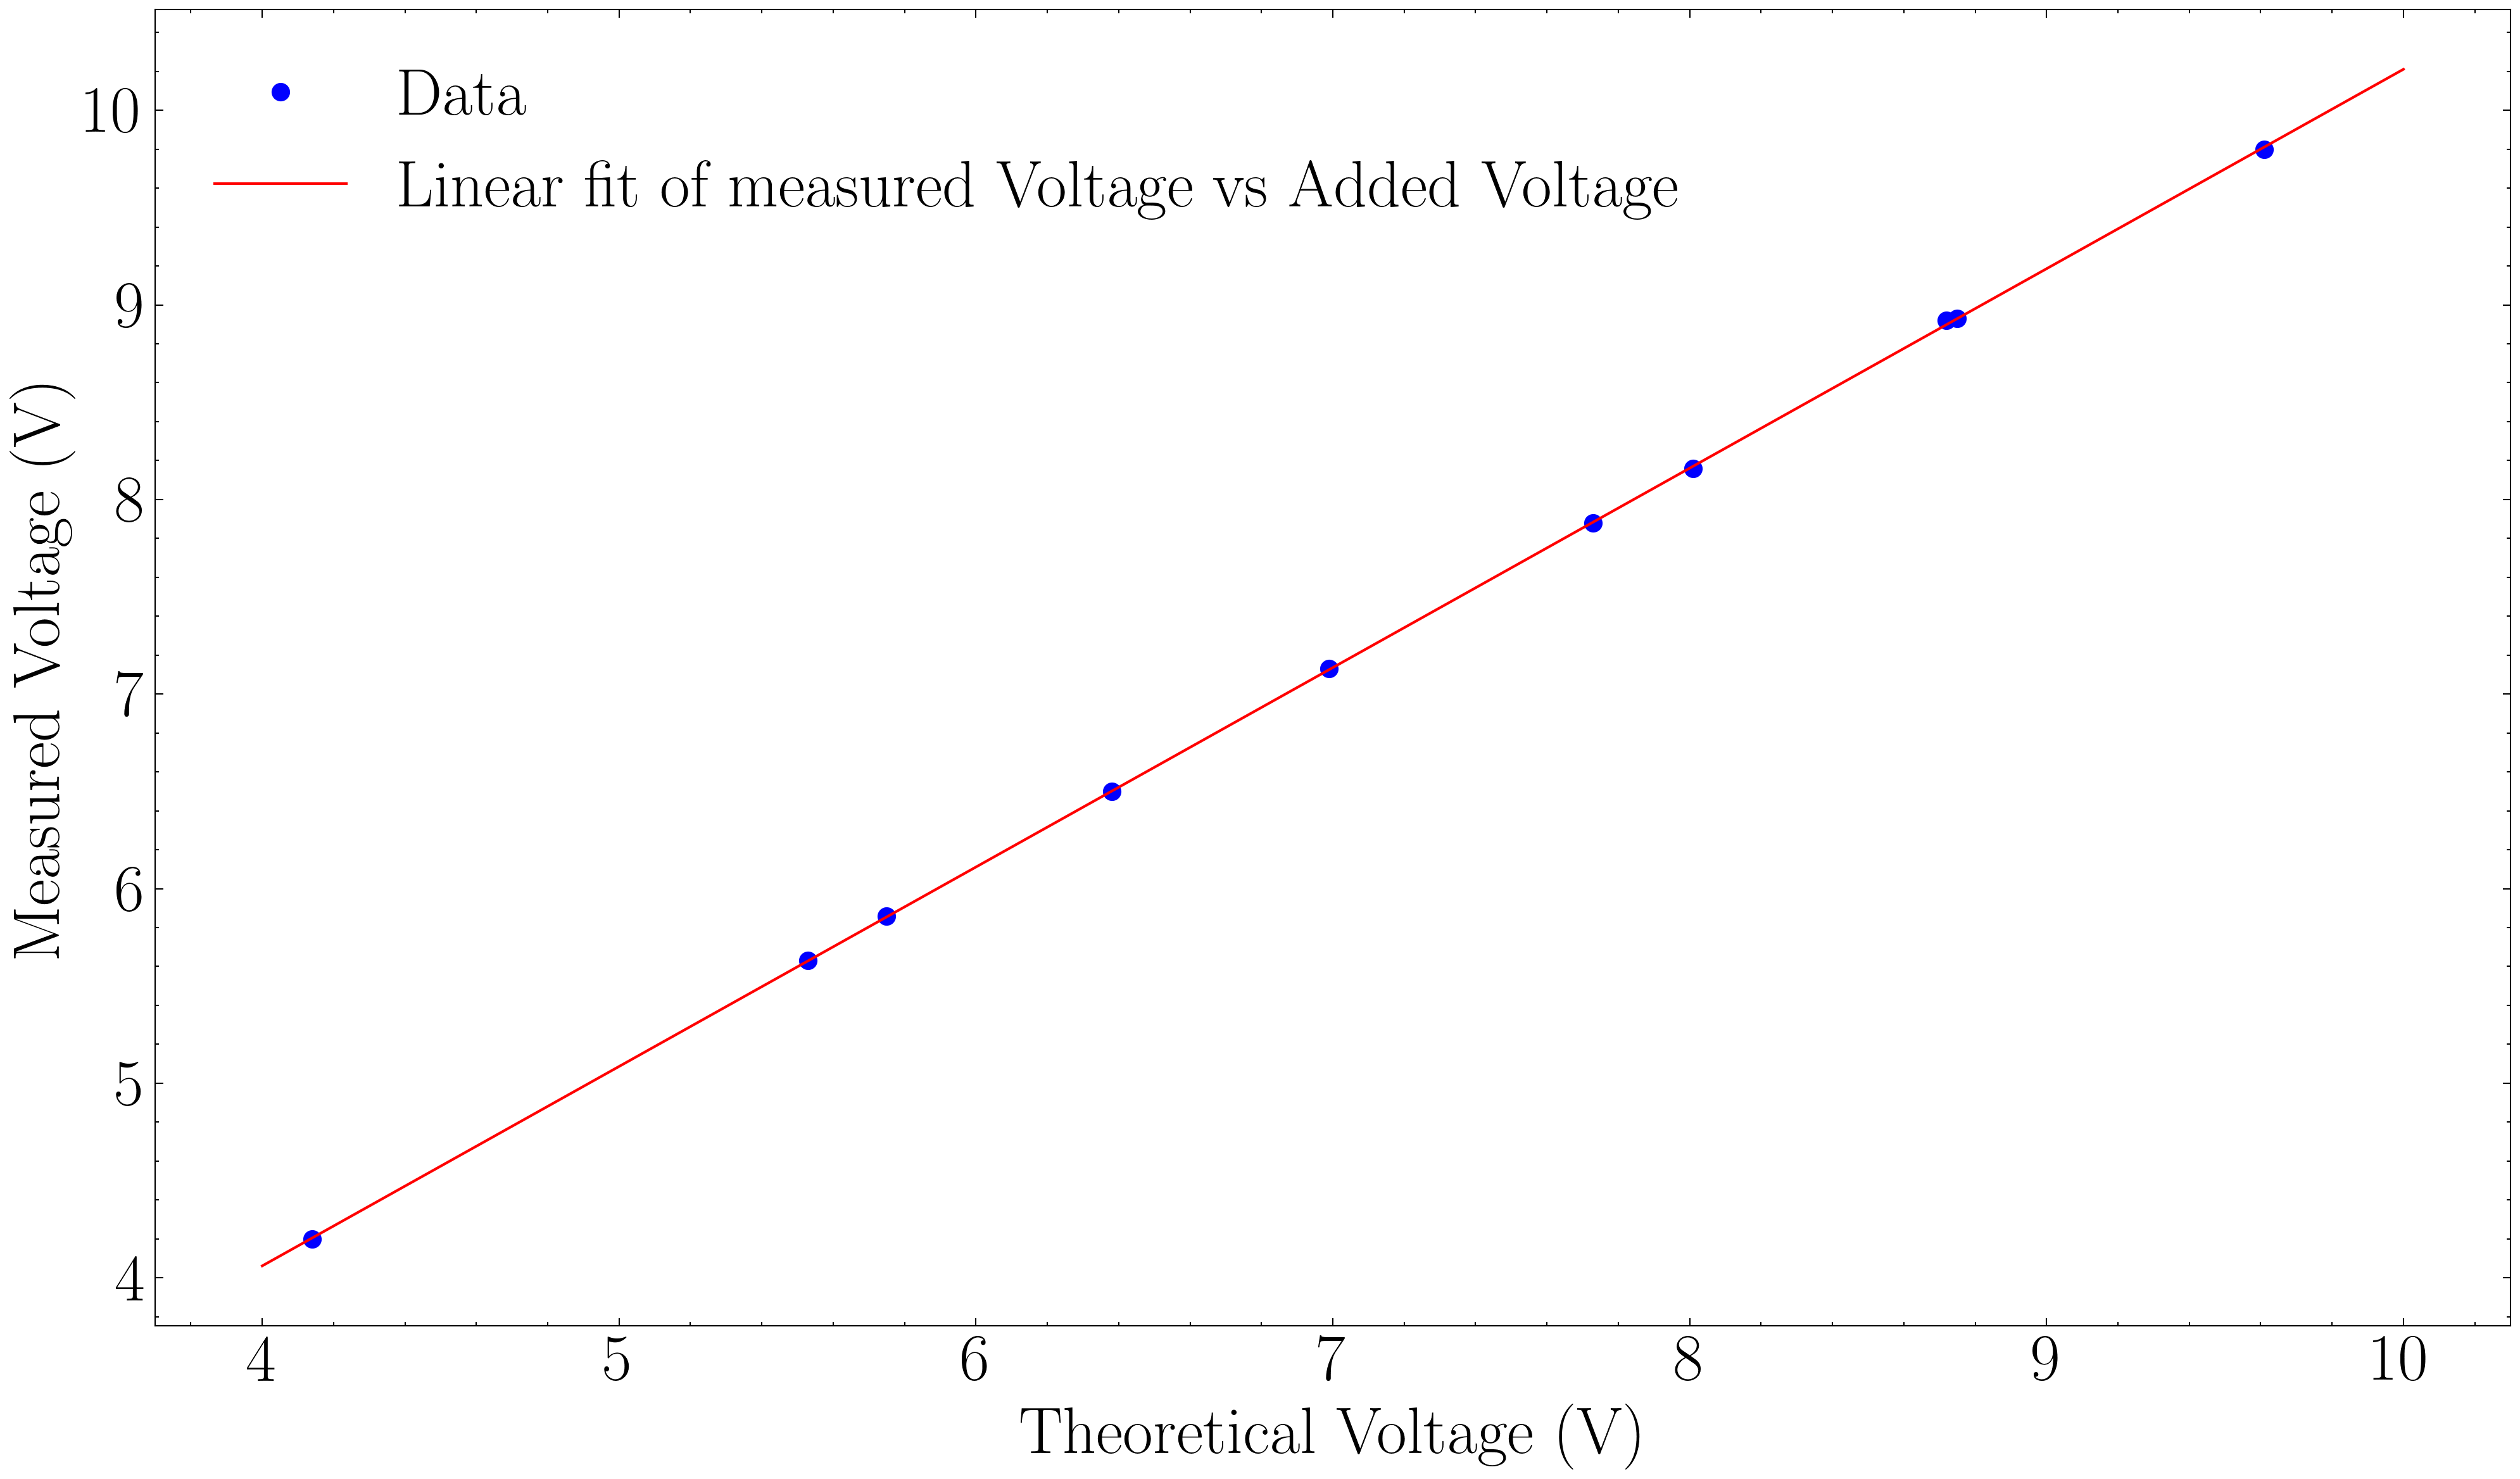

In [38]:
xval = np.linspace(4,10,100)
yval = linfit(xval, params[0], params[1])
plt.figure(figsize = (16,9), dpi =300)
plt.plot(vot, vom,'bo', label = "Data")
plt.plot(xval, yval, 'r-', label = "Linear fit of measured Voltage vs Added Voltage")
plt.legend()
plt.ylabel("Measured Voltage (V)")
plt.xlabel("Theoretical Voltage (V)")
plt.savefig("Adder_plot.png", dpi = 300)

In [32]:
data2 = pd.read_excel("OP AMP.xlsx", sheet_name="Sub")


In [33]:
data2

,SL. no.,V1(V),V2(V),Vo(Meas),Vo(Theo)
0,1,0.15,1.04,0.91,0.89
1,2,0.26,1.04,0.82,0.78
2,3,0.39,1.04,0.64,0.65
3,4,1.12,3.00,1.97,1.88
4,5,1.39,3.11,1.81,1.72
5,6,1.59,4.07,2.60,2.48
6,7,0.86,3.55,2.78,2.69
7,8,3.02,5.98,3.15,2.96
8,9,1.41,5.80,4.54,4.39
9,10,1.08,4.42,3.46,3.34


In [40]:
voms = np.asarray(data2["Vo(Meas)"])
vots = np.asarray(data2["Vo(Theo)"])

params2, cov2 = curve_fit(linfit, vots, voms)
perr2 = np.sqrt(np.diag(cov2))
params2, perr2

(array([0.99782049, 0.12701829]), array([0.00641424, 0.01433216]))

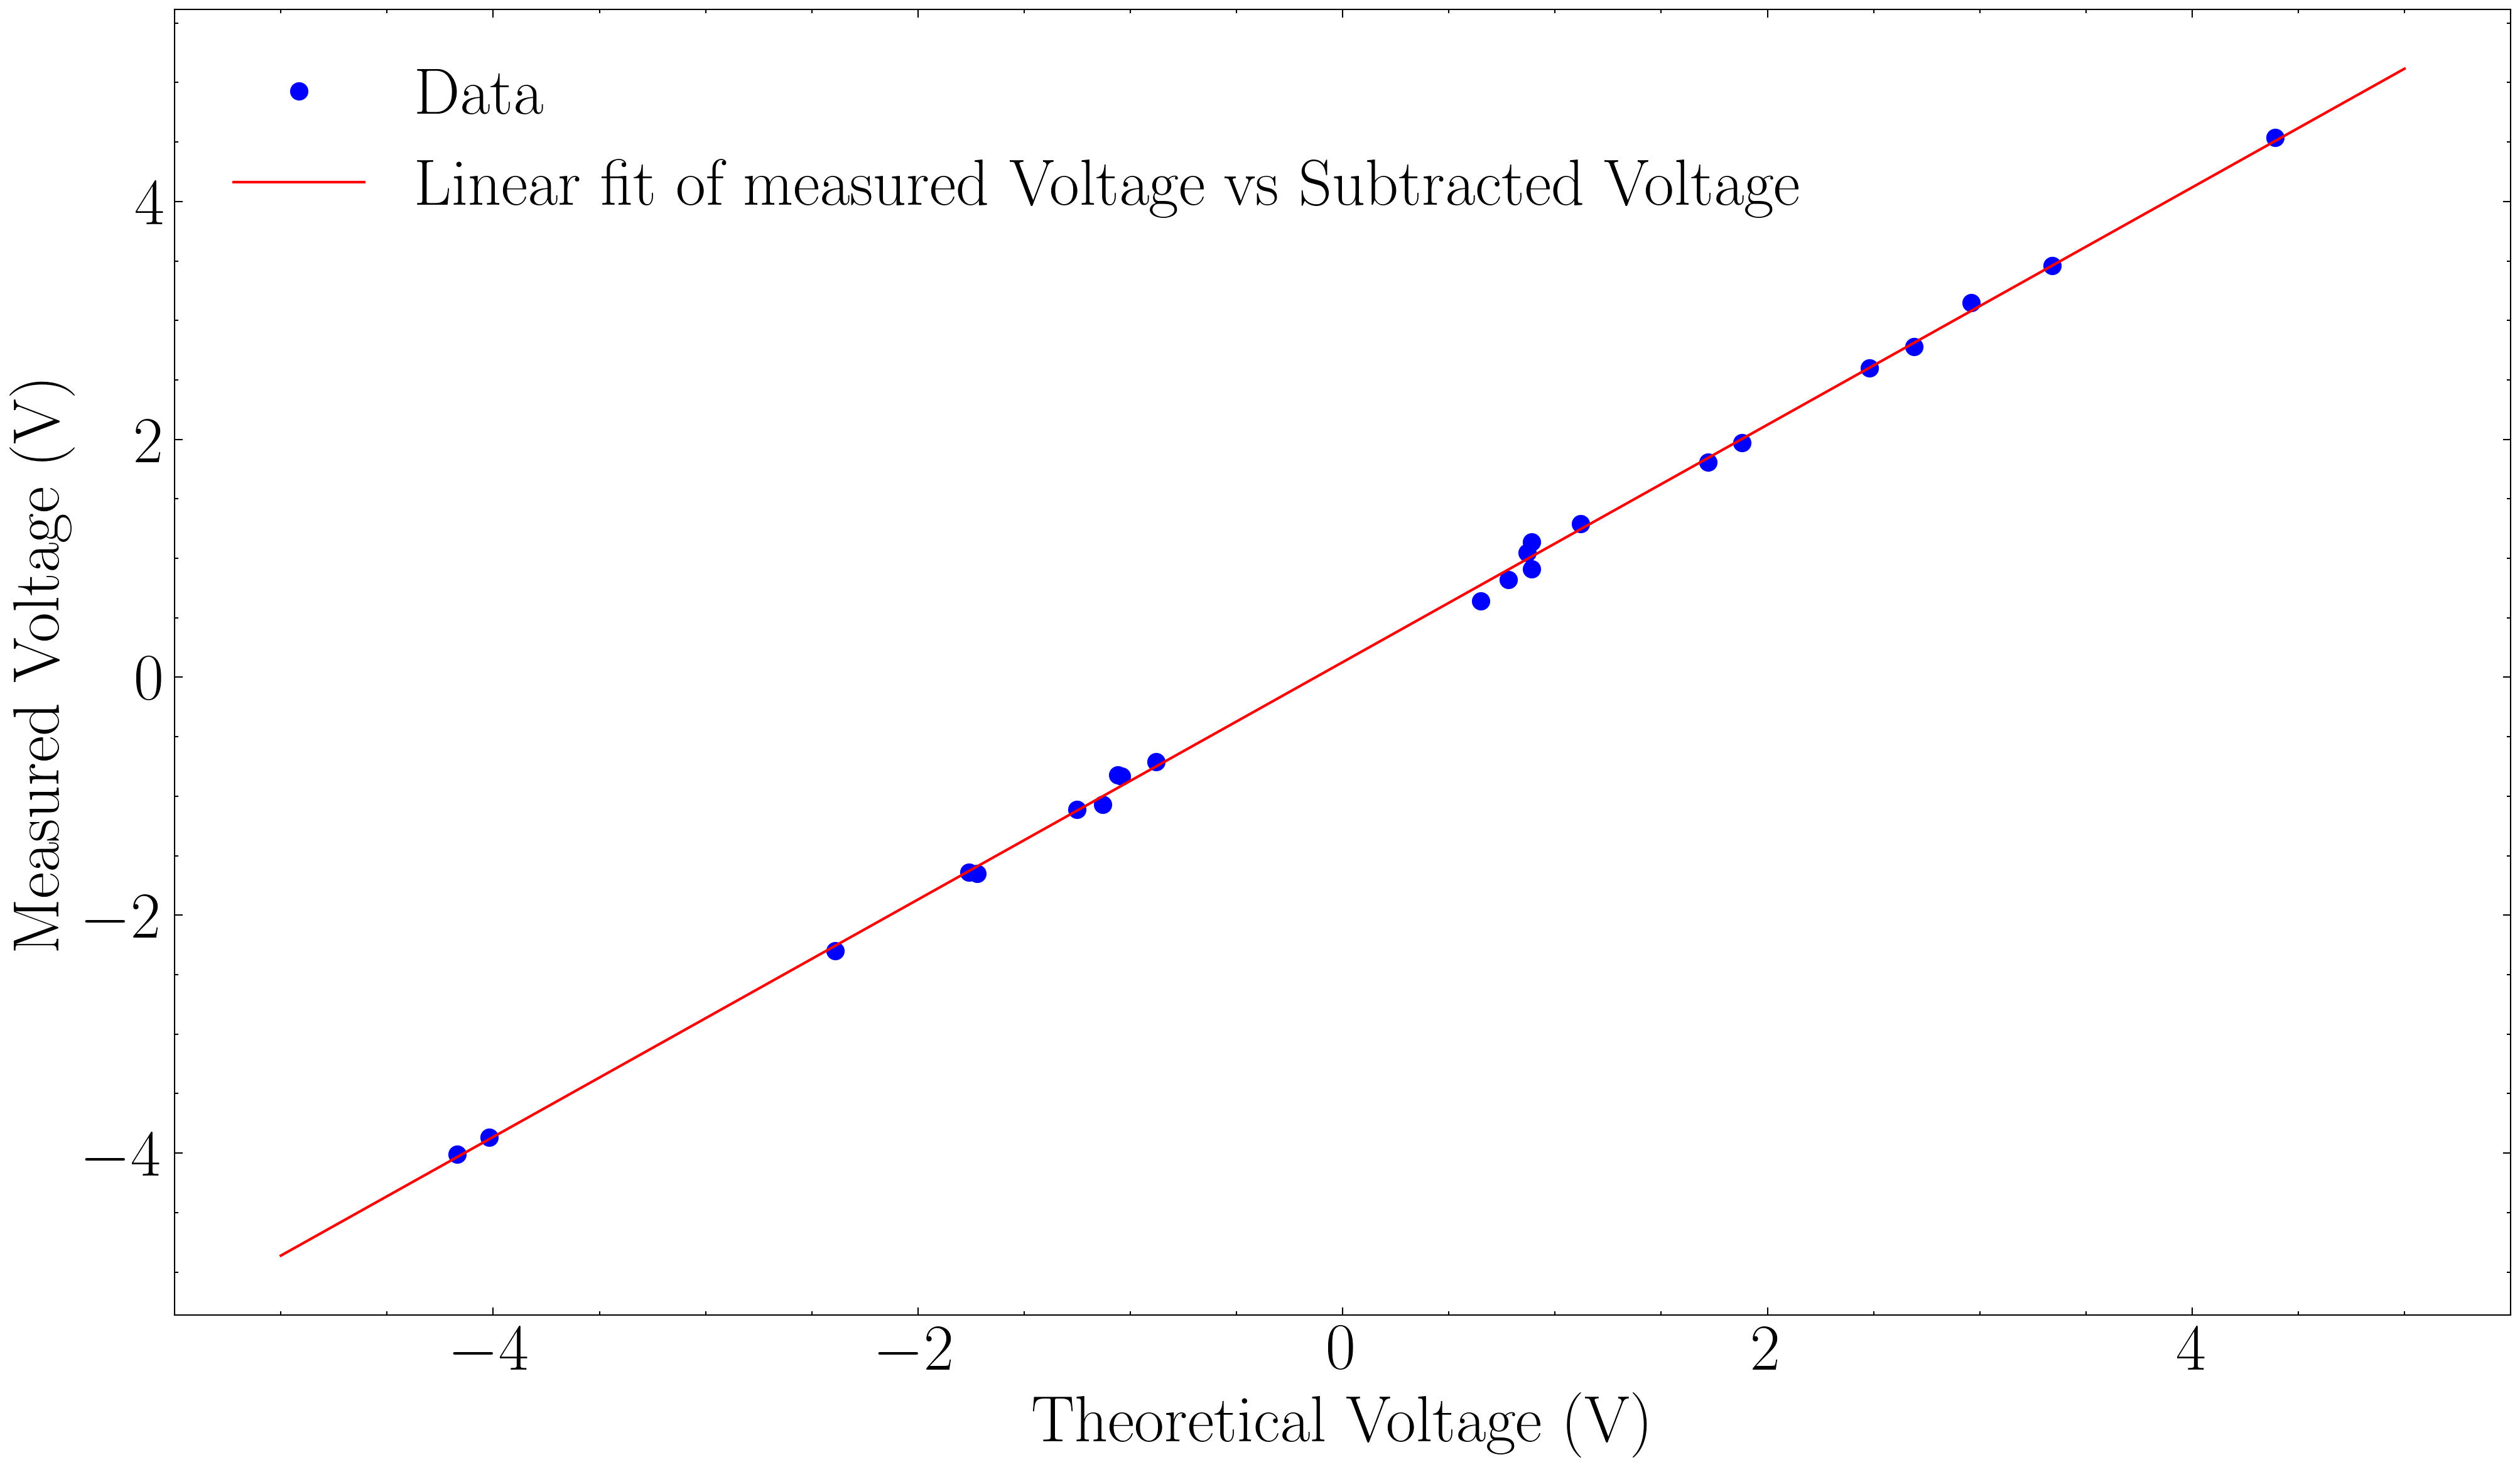

In [39]:
plt.figure(figsize = (16,9), dpi =300)
xval2 = np.linspace(-5,5,100)
yval2 = linfit(xval2, params2[0], params2[1])
plt.plot(vots, voms,'bo', label = "Data")
plt.plot(xval2, yval2, 'r-', label = "Linear fit of measured Voltage vs Subtracted Voltage")
plt.legend()
plt.ylabel("Measured Voltage (V)")
plt.xlabel("Theoretical Voltage (V)")
plt.savefig("Sub_plot.png", dpi = 300)